In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import torch                                       #Pytorch pkg & tensor library
import torchvision                                 
import torchvision.transforms as transforms

import itertools as itertools

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(linewidth= 120)

In [125]:
data= pd.read_csv('../input/eye-disorder-dataset/eye_dataset.csv')
data

,Type,0,1,2,3,4,5,6,7,8,...,50122,50123,50124,50125,50126,50127,50128,50129,50130,50131
0,crossed,44,42,52,47,45,44,37,42,52,...,2,3,4,5,7,9,5,4,7,7
1,crossed,48,46,43,41,41,44,47,49,65,...,91,87,75,78,82,85,84,80,74,71
2,crossed,118,120,121,122,125,124,123,131,128,...,164,166,162,159,157,158,158,162,158,163
3,crossed,113,112,112,115,116,116,116,116,116,...,127,123,125,123,123,120,123,126,119,124
4,crossed,63,64,66,68,69,70,69,66,65,...,107,105,104,103,108,107,103,99,97,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,cat,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
96,cat,35,39,45,50,53,51,50,49,51,...,164,164,164,164,164,164,164,164,165,165
97,cat,84,84,84,85,85,85,86,86,86,...,209,208,214,222,219,218,217,215,214,212
98,cat,199,199,199,200,200,201,201,207,207,...,245,245,246,246,247,247,247,248,249,249


In [126]:
# Encoding the Type values
data= data.replace(to_replace ="bulk", 
                 value =0)

data= data.replace(to_replace ="cat", 
                 value =1)

data= data.replace(to_replace ="crossed", 
                 value =2)
data

,Type,0,1,2,3,4,5,6,7,8,...,50122,50123,50124,50125,50126,50127,50128,50129,50130,50131
0,2,44,42,52,47,45,44,37,42,52,...,2,3,4,5,7,9,5,4,7,7
1,2,48,46,43,41,41,44,47,49,65,...,91,87,75,78,82,85,84,80,74,71
2,2,118,120,121,122,125,124,123,131,128,...,164,166,162,159,157,158,158,162,158,163
3,2,113,112,112,115,116,116,116,116,116,...,127,123,125,123,123,120,123,126,119,124
4,2,63,64,66,68,69,70,69,66,65,...,107,105,104,103,108,107,103,99,97,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
96,1,35,39,45,50,53,51,50,49,51,...,164,164,164,164,164,164,164,164,165,165
97,1,84,84,84,85,85,85,86,86,86,...,209,208,214,222,219,218,217,215,214,212
98,1,199,199,199,200,200,201,201,207,207,...,245,245,246,246,247,247,247,248,249,249


In [127]:
train= data.drop(['Type'], axis= 1)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,50122,50123,50124,50125,50126,50127,50128,50129,50130,50131
0,44,42,52,47,45,44,37,42,52,87,...,2,3,4,5,7,9,5,4,7,7
1,48,46,43,41,41,44,47,49,65,61,...,91,87,75,78,82,85,84,80,74,71
2,118,120,121,122,125,124,123,131,128,127,...,164,166,162,159,157,158,158,162,158,163
3,113,112,112,115,116,116,116,116,116,116,...,127,123,125,123,123,120,123,126,119,124
4,63,64,66,68,69,70,69,66,65,63,...,107,105,104,103,108,107,103,99,97,95


In [128]:
target= data['Type']
target.head()

0    2
1    2
2    2
3    2
4    2
Name: Type, dtype: int64

In [129]:
print(torch.__version__)
print(torchvision.__version__)

1.5.1
0.6.0a0+35d732a


In [130]:

print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

if torch.cuda.is_available():
    device = torch.device('cuda')
print(device)

True
True
cuda


In [131]:

#Training and Validation Split
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(train, target, stratify=target, random_state=123,
                                                                     test_size=0.20)

In [132]:
X_train = np.array(X_train, dtype = 'float32')
Y_train = np.array(Y_train, dtype = 'float32')
X_val = np.array(X_val, dtype = 'float32')
Y_val = np.array(Y_val, dtype = 'float32')

In [133]:
torch_X_train = torch.from_numpy(X_train).type(torch.LongTensor)
torch_y_train = torch.from_numpy(Y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for val set.
torch_X_val = torch.from_numpy(X_val).type(torch.LongTensor)
torch_y_val = torch.from_numpy(Y_val).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
val = torch.utils.data.TensorDataset(torch_X_val,torch_y_val)


In [134]:
torch_X_train = torch_X_train.view(-1, 1,151,332).float()
torch_X_val = torch_X_val.view(-1,1,151,332).float()
print(torch_X_train.shape)
print(torch_X_val.shape)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
val = torch.utils.data.TensorDataset(torch_X_val,torch_y_val)

torch.Size([80, 1, 151, 332])
torch.Size([20, 1, 151, 332])


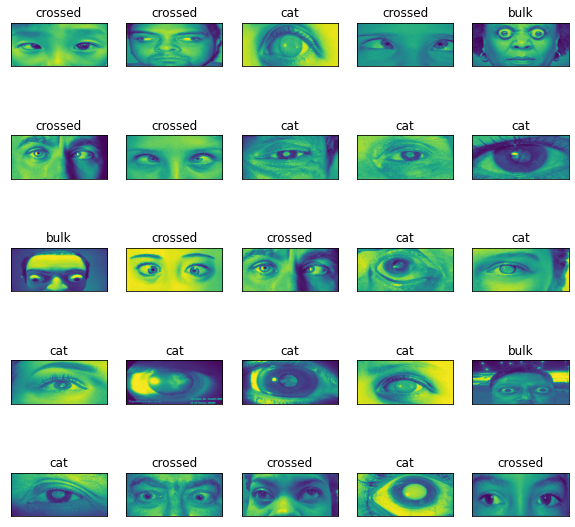

In [135]:
class_names = ['bulk', 'cat', 'crossed']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((151,332)))
    label_index = int(Y_train[i])
    plt.title(class_names[label_index])
plt.show()

# Creating the CNN model

In [136]:
332-16 

316

In [137]:
# Forming CNN with hidden layers

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=5) # Convolution layer 1
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5) # Convolution layer 2
        
        self.fc1 = nn.Linear(in_features=16 * 32 * 85, out_features=120) # Linear layer 1 [Linear layer also called Fully Connected Layers]
        self.fc2 = nn.Linear(in_features=120, out_features=60) # Linear layer 2
        self.out = nn.Linear(in_features=60, out_features=3) # Linear layer 3 (output layer)
        
    def forward(self, t):
        # input layer
        t=t
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(t.size(0), 16 * 32 * 85)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

In [138]:
# Function for calculating correct predictions
def get_num_correct(preds, labels):
    return preds.argmax(dim= 1).eq(labels).sum().item()

In [139]:
network= Network()
network

Network(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=43520, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=3, bias=True)
)

# Passing the training tensor to CNN

In [149]:
network = Network()

train_loader = torch.utils.data.DataLoader(train, batch_size=10)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(8):
    
    total_loss = 0
    total_correct = 0
    
    for batch in train_loader: # Get Batch
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print("epoch", epoch, "total_correct:", total_correct, "loss:", total_loss)

epoch 0 total_correct: 21 loss: 2413.2205913066864
epoch 1 total_correct: 38 loss: 9.06884241104126
epoch 2 total_correct: 40 loss: 8.311215937137604
epoch 3 total_correct: 44 loss: 7.1423124969005585
epoch 4 total_correct: 50 loss: 6.352514088153839
epoch 5 total_correct: 59 loss: 7.170293569564819
epoch 6 total_correct: 60 loss: 5.63370418548584
epoch 7 total_correct: 72 loss: 2.581494018435478


In [150]:
accuracy_post8epochs= (total_correct/len(train))*100
print('Accuracy=' + str(accuracy_post8epochs) + '%')

Accuracy=90.0%


# Testing on validation set

In [155]:
network = Network()

train_loader = torch.utils.data.DataLoader(val, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(20):
    
    total_loss = 0
    total_correct = 0
    
    for batch in train_loader: # Get Batch
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print("epoch", epoch, "total_correct:", total_correct, "loss:", total_loss)

epoch 0 total_correct: 7 loss: 1.9516513347625732
epoch 1 total_correct: 8 loss: 317.4208984375
epoch 2 total_correct: 5 loss: 161.36178588867188
epoch 3 total_correct: 5 loss: 3.8161423206329346
epoch 4 total_correct: 8 loss: 4.2104902267456055
epoch 5 total_correct: 16 loss: 0.6908230185508728
epoch 6 total_correct: 14 loss: 0.5512737035751343
epoch 7 total_correct: 14 loss: 0.6375460624694824
epoch 8 total_correct: 13 loss: 0.6732019782066345
epoch 9 total_correct: 14 loss: 0.6113539934158325
epoch 10 total_correct: 15 loss: 0.5176123380661011
epoch 11 total_correct: 19 loss: 0.40561795234680176
epoch 12 total_correct: 19 loss: 0.2860092222690582
epoch 13 total_correct: 19 loss: 0.207911878824234
epoch 14 total_correct: 18 loss: 0.16988228261470795
epoch 15 total_correct: 19 loss: 0.10094945132732391
epoch 16 total_correct: 20 loss: 0.028857756406068802
epoch 17 total_correct: 20 loss: 0.001036584610119462
epoch 18 total_correct: 20 loss: 3.21943371091038e-05
epoch 19 total_correct:

In [156]:
accuracy_post8epochs= (total_correct/len(val))*100
print('Accuracy=' + str(accuracy_post8epochs) + '%')

Accuracy=100.0%
